In [ ]:
## Quick plot to argue that taxing graduates extra is semi-reasonable because of increased willingness to pay

In [11]:
%%time
dataset_name = "W19_comb"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

# del BES_Panel

Toggle code

Wall time: 12.5 s


In [ ]:
###

* education
* income
* redist/taxSpend

In [12]:
search(BES_Panel,"edlevel")

p_edlevelW1        25576
p_edlevelW2        25419
p_edlevelW3        23735
p_edlevelW4        26686
p_edlevelW5        26129
p_edlevelW6        25541
p_edlevelW7        26256
p_edlevelW8        28334
p_edlevelW9        25425
p_edlevelW10       25808
p_edlevelW11       26328
p_edlevelW12       29170
p_edlevelW13       26577
p_edlevelW14       26296
p_edlevelW15       26109
p_edlevelW16       31861
p_edlevelW17       29092
p_edlevelW18       31920
p_edlevelW19       27317
p_edlevelUniW7     28593
p_edlevelUniW9     27956
p_edlevelUniW10    28127
p_edlevelUniW11    28826
p_edlevelUniW12    32001
p_edlevelUniW13    29078
p_edlevelUniW14    28812
p_edlevelUniW15    28520
p_edlevelUniW16    34927
p_edlevelUniW19    29841
p_edlevelUniW8     29016
p_edlevelUniW17    31098
p_edlevelUniW18    23047
dtype: int64

In [18]:
BES_Panel["p_edlevelUniW19"].value_counts()

Undergraduate        11522
GCSE                  6079
A-level               5812
Postgrad              3155
No qualifications     2041
Below GCSE            1232
Name: p_edlevelUniW19, dtype: int64

In [19]:
BES_Panel["p_edlevelW19"].value_counts()

Undergraduate        9471
GCSE                 6079
A-level              5339
Postgrad             3155
No qualifications    2041
Below GCSE           1232
Name: p_edlevelW19, dtype: int64

In [10]:
search(BES_Panel,"profile_gross|redist|tax|lr1")

redistSelf                 32177
redistCon                  32177
redistLab                  32177
redistLD                   32177
redistSNP                   3223
redistPC                    1986
redistBrexit               32177
redistGreen                32177
profile_gross_household    32167
profile_gross_personal     32002
dtype: int64

In [ ]:
# howToReduceDeficit W17

# tax(High|Middle|Low)Income | spend(Health|Pensions|Unemp) W15

# taxSpendSelf W18W20

# lr1

In [28]:
p_gross_personal = amalgamate_waves(BES_Panel, "p_gross_personal", forward_fill=True, specify_wave_order = None,
                                    low_priority_values = ["Â Don't know",       'Â Prefer not to answer'], match=True)

Amalgamating variables: 
{1: 'p_gross_personalW1', 2: 'p_gross_personalW2', 3: 'p_gross_personalW3', 4: 'p_gross_personalW4', 5: 'p_gross_personalW5', 6: 'p_gross_personalW6', 7: 'p_gross_personalW7', 8: 'p_gross_personalW8', 9: 'p_gross_personalW9', 10: 'p_gross_personalW10', 11: 'p_gross_personalW11', 12: 'p_gross_personalW12', 13: 'p_gross_personalW13', 14: 'p_gross_personalW14', 15: 'p_gross_personalW15', 16: 'p_gross_personalW16', 17: 'p_gross_personalW17', 18: 'p_gross_personalW18', 19: 'p_gross_personalW19'} ['p_gross_personalW1', 'p_gross_personalW2', 'p_gross_personalW3', 'p_gross_personalW4', 'p_gross_personalW5', 'p_gross_personalW6', 'p_gross_personalW7', 'p_gross_personalW8', 'p_gross_personalW9', 'p_gross_personalW10', 'p_gross_personalW11', 'p_gross_personalW12', 'p_gross_personalW13', 'p_gross_personalW14', 'p_gross_personalW15', 'p_gross_personalW16', 'p_gross_personalW17', 'p_gross_personalW18', 'p_gross_personalW19']


In [36]:
p_gross_household = amalgamate_waves(BES_Panel, "p_gross_household", forward_fill=True, specify_wave_order = None,
                                    low_priority_values = ["Â Don't know",       'Â Prefer not to answer'], match=True)

Amalgamating variables: 
{1: 'p_gross_householdW1', 2: 'p_gross_householdW2', 3: 'p_gross_householdW3', 4: 'p_gross_householdW4', 5: 'p_gross_householdW5', 6: 'p_gross_householdW6', 7: 'p_gross_householdW7', 8: 'p_gross_householdW8', 9: 'p_gross_householdW9', 10: 'p_gross_householdW10', 11: 'p_gross_householdW11', 12: 'p_gross_householdW12', 13: 'p_gross_householdW13', 14: 'p_gross_householdW14', 15: 'p_gross_householdW15', 16: 'p_gross_householdW16', 17: 'p_gross_householdW17', 18: 'p_gross_householdW18', 19: 'p_gross_householdW19'} ['p_gross_householdW1', 'p_gross_householdW2', 'p_gross_householdW3', 'p_gross_householdW4', 'p_gross_householdW5', 'p_gross_householdW6', 'p_gross_householdW7', 'p_gross_householdW8', 'p_gross_householdW9', 'p_gross_householdW10', 'p_gross_householdW11', 'p_gross_householdW12', 'p_gross_householdW13', 'p_gross_householdW14', 'p_gross_householdW15', 'p_gross_householdW16', 'p_gross_householdW17', 'p_gross_householdW18', 'p_gross_householdW19']


In [33]:
lr1 = amalgamate_waves(BES_Panel, "lr1", forward_fill=True, specify_wave_order = None,
                                    low_priority_values = ["Don't know"], match=True)

Amalgamating variables: 
{6: 'lr1W6', 13: 'lr1W13', 16: 'lr1W16', 17: 'lr1W17', 1: 'lr1W1_W5', 14: 'lr1W14W15', 7: 'lr1W7_W9', 10: 'lr1W10_W12'} ['lr1W1_W5', 'lr1W6', 'lr1W7_W9', 'lr1W10_W12', 'lr1W13', 'lr1W14W15', 'lr1W16', 'lr1W17']


In [37]:
redistSelf = amalgamate_waves(BES_Panel, "redistSelf", forward_fill=True, specify_wave_order = None,
                                    low_priority_values = ["Don't know"], match=True)

Amalgamating variables: 
{1: 'redistSelfW1', 2: 'redistSelfW2', 3: 'redistSelfW3', 4: 'redistSelfW4', 6: 'redistSelfW6', 7: 'redistSelfW7', 10: 'redistSelfW10', 11: 'redistSelfW11', 12: 'redistSelfW12', 13: 'redistSelfW13', 14: 'redistSelfW14', 15: 'redistSelfW15', 16: 'redistSelfW16', 17: 'redistSelfW17', 18: 'redistSelfW18', 19: 'redistSelfW19'} ['redistSelfW1', 'redistSelfW2', 'redistSelfW3', 'redistSelfW4', 'redistSelfW6', 'redistSelfW7', 'redistSelfW10', 'redistSelfW11', 'redistSelfW12', 'redistSelfW13', 'redistSelfW14', 'redistSelfW15', 'redistSelfW16', 'redistSelfW17', 'redistSelfW18', 'redistSelfW19']


In [40]:
p_edlevelUni = amalgamate_waves(BES_Panel, "p_edlevelUni", forward_fill=True, specify_wave_order = None,
                                    low_priority_values = ["Don't know"], match=True)

Amalgamating variables: 
{7: 'p_edlevelUniW7', 9: 'p_edlevelUniW9', 10: 'p_edlevelUniW10', 11: 'p_edlevelUniW11', 12: 'p_edlevelUniW12', 13: 'p_edlevelUniW13', 14: 'p_edlevelUniW14', 15: 'p_edlevelUniW15', 16: 'p_edlevelUniW16', 19: 'p_edlevelUniW19', 8: 'p_edlevelUniW8', 17: 'p_edlevelUniW17', 18: 'p_edlevelUniW18'} ['p_edlevelUniW7', 'p_edlevelUniW8', 'p_edlevelUniW9', 'p_edlevelUniW10', 'p_edlevelUniW11', 'p_edlevelUniW12', 'p_edlevelUniW13', 'p_edlevelUniW14', 'p_edlevelUniW15', 'p_edlevelUniW16', 'p_edlevelUniW17', 'p_edlevelUniW18', 'p_edlevelUniW19']


In [69]:
anyUni = amalgamate_waves(BES_Panel, "anyUni", forward_fill=True, specify_wave_order = None,
                                    low_priority_values = ["Don't know"], match=True)

Amalgamating variables: 
{7: 'anyUniW7', 9: 'anyUniW9', 10: 'anyUniW10', 11: 'anyUniW11', 12: 'anyUniW12', 13: 'anyUniW13', 14: 'anyUniW14', 15: 'anyUniW15', 16: 'anyUniW16', 17: 'anyUniW17', 19: 'anyUniW19'} ['anyUniW7', 'anyUniW9', 'anyUniW10', 'anyUniW11', 'anyUniW12', 'anyUniW13', 'anyUniW14', 'anyUniW15', 'anyUniW16', 'anyUniW17', 'anyUniW19']


In [44]:
taxSpendSelf = amalgamate_waves(BES_Panel, "taxSpendSelf", forward_fill=True, specify_wave_order = None,
                                    low_priority_values = ["Don't know"], match=True)

# BES_Panel["taxSpendSelf"].value_counts()#


Amalgamating variables: 
{14: 'taxSpendSelfW14', 15: 'taxSpendSelfW15', 18: 'taxSpendSelfW18'} ['taxSpendSelfW14', 'taxSpendSelfW15', 'taxSpendSelfW18']


In [68]:
search(BES_Panel,"anyUni")
BES_Panel["anyUniW19"].value_counts()

Yes, I graduated from higher education              15264
No, I have never attended higher education          12545
Yes, but I didn't complete higher education          2509
Yes, I am currently enrolled in higher education     1116
Don't know                                            743
Name: anyUniW19, dtype: int64

In [30]:
p_gross_personal[BES_Panel["p_gross_personalW19"].notnull()].value_counts()

Â Prefer not to answer           4380
Â £10,000 to £14,999 per year    4303
Â £15,000 to £19,999 per year    3564
Â £5,000 to £9,999 per year      3302
Â £20,000 to £24,999 per year    3266
Â £25,000 to £29,999 per year    2647
Â under £5,000 per year          2529
Â £30,000 to £34,999 per year    2092
Â £35,000 to £39,999 per year    1404
Â £40,000 to £44,999 per year    1039
Â £50,000 to £59,999 per year     842
Â £45,000 to £49,999 per year     727
Â Don't know                      605
Â £70,000 to £99,999 per year     563
Â £60,000 to £69,999 per year     448
Â £100,000 and over               305
Name: p_gross_personalW1&2&3&4&5&6&7&8&9&10&11&12&13&14&15&16&17&18&19, dtype: int64

In [97]:
taxSpendSelf.name

'taxSpendSelfW14&15&18'

In [76]:
# df["anyUniW7&9&10&11&12&13&14&15&16&17&19"].cat.categories



In [98]:
df = pd.concat([p_gross_personal,redistSelf,p_edlevelUni,anyUni,taxSpendSelf],axis=1)

In [101]:
df["govtEqualiseIncomes"] = df["redistSelfW1&2&3&4&6&7&10&11&12&13&14&15&16&17&18&19"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
df["taxSpendSelf"] = df["taxSpendSelfW14&15&18"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
replace_dict = {'No, I have never attended higher education':"No",
       'Yes, I am currently enrolled in higher education':np.nan,
       "Yes, but I didn't complete higher education":np.nan,
       'Yes, I graduated from higher education':"Yes", "Don't know":np.nan}
df["anyUni"] = df["anyUniW7&9&10&11&12&13&14&15&16&17&19"].replace(replace_dict).astype('category')

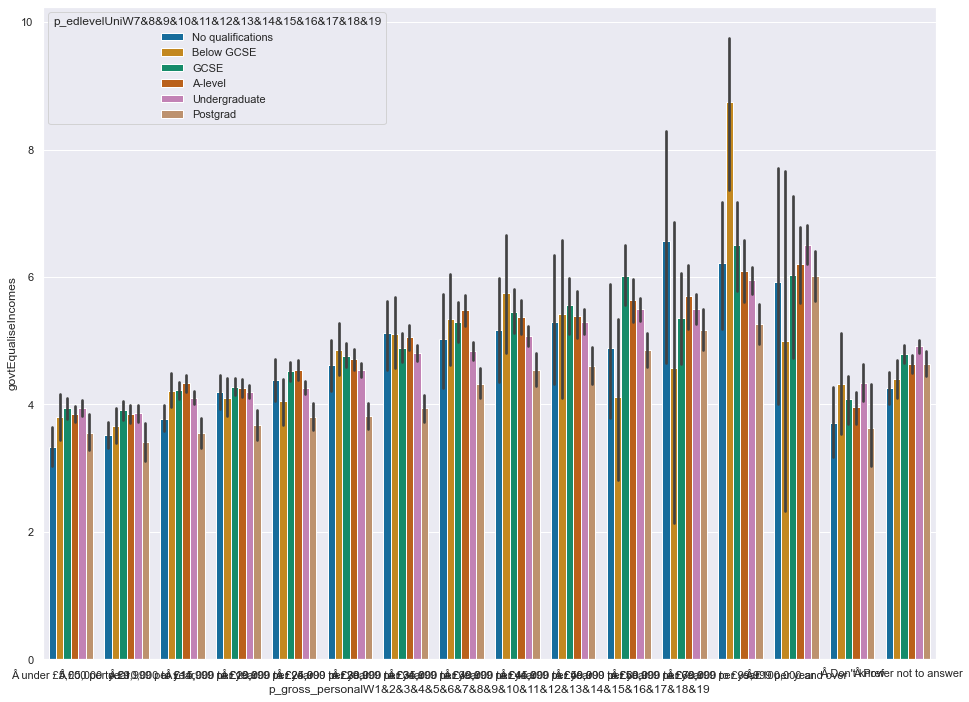

In [60]:
plt.figure(figsize=(16,12))
sns.barplot(data=df,x="p_gross_personalW1&2&3&4&5&6&7&8&9&10&11&12&13&14&15&16&17&18&19",
           y="govtEqualiseIncomes",
           hue="p_edlevelUniW7&8&9&10&11&12&13&14&15&16&17&18&19")

In [59]:
df["p_edlevelUniW7&8&9&10&11&12&13&14&15&16&17&18&19"].value_counts().sort_index()

No qualifications     5197
Below GCSE            3163
GCSE                 15056
A-level              17519
Undergraduate        30096
Postgrad              7879
Name: p_edlevelUniW7&8&9&10&11&12&13&14&15&16&17&18&19, dtype: int64

In [63]:
pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories

IntervalIndex([(17.0, 28.0], (28.0, 37.0], (37.0, 46.0], (46.0, 55.0], (55.0, 63.0], (63.0, 71.0], (71.0, 106.0]],
              closed='right',
              dtype='interval[float64]')

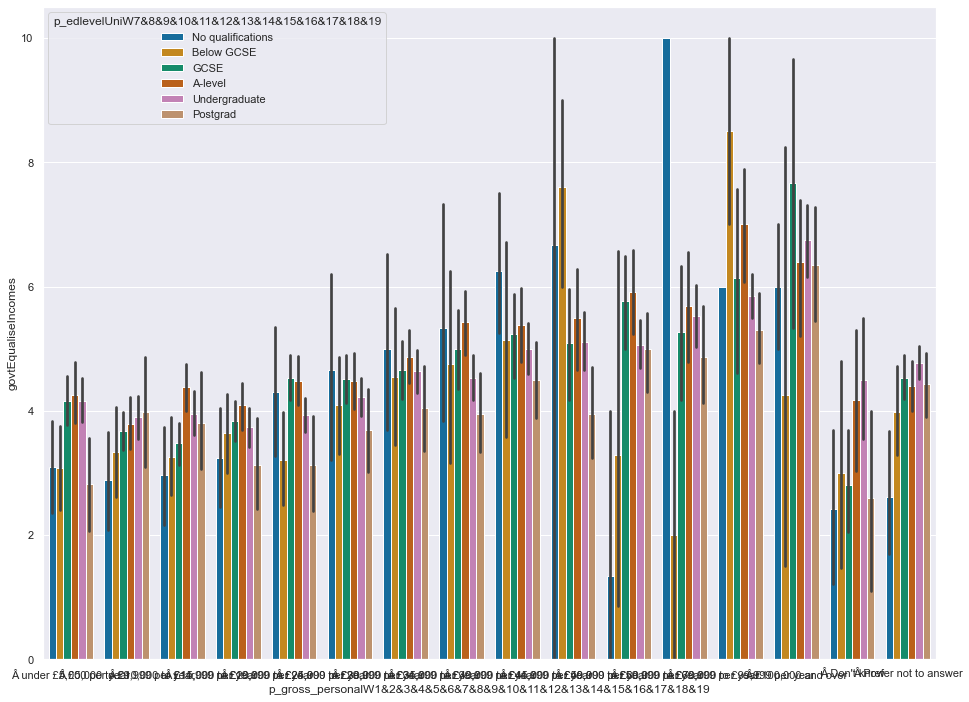

In [65]:
mask = pan_dataset_ages["equalisedAgeGroup_at_W19"]==pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[3]
plt.figure(figsize=(16,12))
sns.barplot(data=df[mask],x="p_gross_personalW1&2&3&4&5&6&7&8&9&10&11&12&13&14&15&16&17&18&19",
           y="govtEqualiseIncomes",
           hue="p_edlevelUniW7&8&9&10&11&12&13&14&15&16&17&18&19")

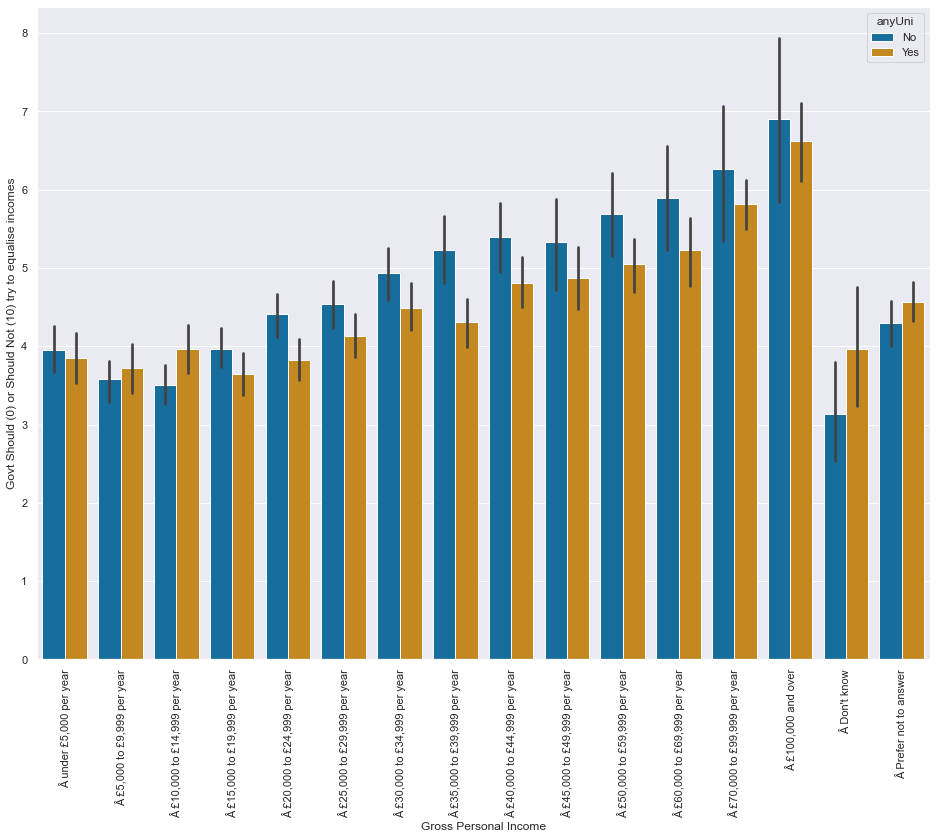

In [84]:
mask = pan_dataset_ages["equalisedAgeGroup_at_W19"]==pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[3]
plt.figure(figsize=(16,12))
sns.barplot(data=df[mask],x="p_gross_personalW1&2&3&4&5&6&7&8&9&10&11&12&13&14&15&16&17&18&19",
           y="govtEqualiseIncomes",
           hue="anyUni");
plt.xticks(rotation=90);
plt.xlabel("Gross Personal Income");
plt.ylabel("Govt Should (0) or Should Not (10) try to equalise incomes");

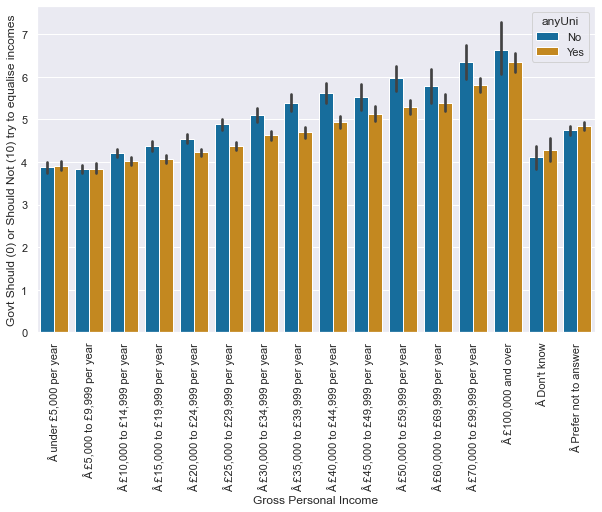

In [87]:
mask = pan_dataset_ages["equalisedAgeGroup_at_W19"]==pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[3]
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="p_gross_personalW1&2&3&4&5&6&7&8&9&10&11&12&13&14&15&16&17&18&19",
           y="govtEqualiseIncomes",
           hue="anyUni");
plt.xticks(rotation=90);
plt.xlabel("Gross Personal Income");
plt.ylabel("Govt Should (0) or Should Not (10) try to equalise incomes");

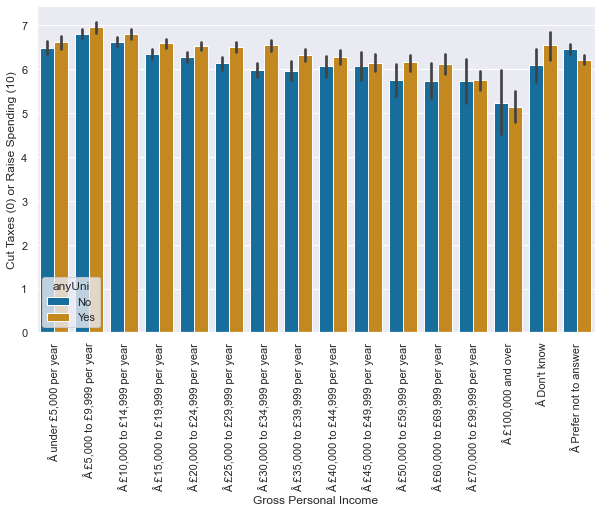

In [106]:
mask = pan_dataset_ages["equalisedAgeGroup_at_W19"]==pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[6]
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="p_gross_personalW1&2&3&4&5&6&7&8&9&10&11&12&13&14&15&16&17&18&19",
           y="taxSpendSelf",
           hue="anyUni");
plt.xticks(rotation=90);
plt.xlabel("Gross Personal Income");
plt.ylabel("Cut Taxes (0) or Raise Spending (10)");
# plt.title("Using the 0 to 10 scale below, where the end marked 0 means that government should\n<i>cut taxes a lot and spend much less on health and social services</i>,\n and the end marked 10 means that government should <i>raise taxes a lot and spend much more on health and social services</i>,\nwhere would you place <i>yourself</i> on this scale?")